In [1]:
import numpy as np
import time
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Line Search Algorithms

Goal is to approximate the minimum value of $f$. Any line search algorithm chooses $x_k$ like so:

$$
x_{k+1} = x_k + \alpha_k p_k
$$

$\alpha_k$ is the step length, $p_k$ determines the algorithm.

Usually $p_k = - B_k^{-1} f_k$, where $B_k$ is a symmetric, nonsingular matrix (nonzero determinant).

For steepest descent, $B_k = I$.

For Newton's method, $B_k = \nabla^2 f(x_k)$.

For Quasi-Newton method, $B_k$ is an approximation of the Hessian.

## Step direction

Essentially, we need $f(x_{k+1}) \le f(x_k)$, which is satisfied when $p_k^T \nabla f_k < 0$. If a direction $\rho$ satisfies this condition, then $\rho_k$ is a **descent direction**.

## Step length

Given some choice of step direction $\mathbf{p}_k$, we must also determine how far we want to move in that direction, which is in general a more difficult problem. If we want to choose an *optimal* value of $\alpha_k$, we could set
$$ \alpha_k = \min_{\alpha>0} f(\mathbf{x}_k+\alpha \mathbf{p}_k) $$

Or, setting $\phi(\alpha) = f(\mathbf{x}_k + \alpha \mathbf{p}_k)$:
$$ \alpha_k = \min_{\alpha > 0} \phi(\alpha)$$


## Steepest Descent (Gradient Descent)

$$
x_{k+1} = x_k - \alpha_k \nabla f_k
$$
The simplest method uses step direction $p_k = -\nabla f_k$:

In the following example, $f(x, y) = (x + 2y - 7)^2 + (2x + y - 5)^2$

$$\nabla f(x,y) = \begin{bmatrix}
2(x + 2y - 7) + 4(2x + y - 5) \\ 4(x + 2y - 7) + 2(2x + y - 5)
\end{bmatrix}
$$

# Exact Line Search Steepest Descent

In [2]:
#description: exact line search steepest decent method
#parameters :
 #objFunc : objective function
 #gradObjFunc: gradient of objective function
 #x0 : starting point
 #tol : tolerace for stopping criteria
 #maxIter : maximum iteration for stopping criteria

def exact_steepest_decent_method(objFunc, gradObjFunc, x0, tol, maxIter):

  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    def subproblem1D(alpha):
      return objFunc(xk + alpha * pk)
    res = minimize_scalar(subproblem1D) # scipy function to minimize objFunction w.r.t alpha
    print("Exact line search step size: {:.4f}".format(res.x))
    xk = xk + res.x * pk
    pk = -gradObjFunc(xk) # update pk
    k = k + 1
    path.append(xk)
  path = np.array(path) # convert to array

  if norm(pk) <= tol:
    print("Found the minimizer at {x} with {iter} iterations successfully,\
    gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
    print("Unable to locate minimizer within maximum iterations, last\
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [9]:
def QObjFunc(x): # f
    return (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2
def QGradObjFunc(x): # gradient of f
    return np.array([(x[0] + 2 * x[1] - 7) * 2 + (2 * x[0] + x[1] - 5) * 4,
 (x[0] + 2 * x[1] - 7) * 4 + (2 * x[0] + x[1] - 5) * 2])


In [4]:
tic = time.perf_counter()
x0 = np.array([0., 0.])
tol = 1e-9
maxIter = 1e6
#run it
x_1, iter_1, path_1 = exact_steepest_decent_method(QObjFunc,
QGradObjFunc, x0, tol, maxIter)
toc = time.perf_counter()

print("Took {:.4f} seconds".format(toc - tic))


Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4880
Exact line search step size: 0.0557
Exact line search step size: 0.4877
Exact line search step size: 0.0557
Found the minimizer at [1. 3.] with 13 iterations successfully,    gradient's norm is 2.436963899038423e-10.
Took 0.0051 seconds


# Fixed Step Steepest Descent

In [5]:
"""
@description: fixed step length steepest decent method
@parameters :
 @objFunc : objective function
 @gradObjFunc: gradient of objective function
 @alpha : the fixed step length, a.k.a. learning rate
 @x0 : starting point
 @tol : tolerace for stopping criteria
 @maxIter : maximum iteration for stopping criteria
"""
def fixed_step_steepest_decent_method(objFunc, gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=norm(pk)))

  return xk, k, path

In [6]:
alpha = 1e-2
tic = time.perf_counter()
x_2, iter_2, path_2 = fixed_step_steepest_decent_method(QObjFunc, QGradObjFunc,
alpha, x0, tol, maxIter)
toc = time.perf_counter()
print("Took {:.4f} seconds".format(toc - tic))

Found the minimizer at [1. 3.] with 1078 iterations successfully, gradient's norm is 9.845861397310912e-10.
Took 0.0204 seconds


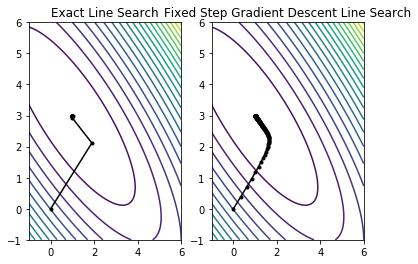

In [7]:
# additional code: contour plots for objective function
# set the region to plot on
x = np.linspace(-1, 6, 500)
y = np.linspace(-1, 6, 500)
X, Y = np.meshgrid(x, y)
# evaluate function
Z = QObjFunc([X,Y])

plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 25);
plt.title("Exact Line Search")
plt.plot(path_1[:,0],path_1[:,1],'-k', marker='.')


plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, 25);
plt.title("Fixed Step Gradient Descent Line Search")
plt.plot(path_2[:,0],path_2[:,1],'-k', marker='.')

# if alpha = 0.000001 then it'll take forever to converge

In each line search:
$x_{k+1} = x_k - \alpha_k \nabla f_k$

Exact line search: $\alpha_k$ is calculated to minimize $f(x_{k+1})$. $\alpha_0 = 0.057, \alpha_1 = .04880$ etc

Fixed Step Gradient Descent: $\alpha_k = 0.01$
